In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("cleaned_hotstar_data.csv")

# Initialize the graph
G = nx.Graph()

# Build actor-director edges
for _, row in df.iterrows():
    director = row['director']
    if director == "Unknown":
        continue
    actors = row['cast'].split(", ") if row['cast'] != "Unknown" else []
    for actor in actors:
        G.add_edge(director.strip(), actor.strip())

# --- Graph Insights ---

# 1. Number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# 2. Top 10 collaborators by degree (most connected people)
top_collaborators = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Most Collaborative People (Directors or Actors):")
for name, degree in top_collaborators:
    print(f"{name}: {degree} connections")

# 3. Visualize the top part of the graph
top_nodes = [node for node, _ in top_collaborators]
subgraph = G.subgraph(top_nodes + [neighbor for node in top_nodes for neighbor in G.neighbors(node)])



Number of nodes: 3502
Number of edges: 4147

Top 10 Most Collaborative People (Directors or Actors):
Paul Hoen: 89 connections
Robert Stevenson: 58 connections
Vincent McEveety: 53 connections
Duwayne Dunham: 48 connections
Norman Tokar: 46 connections
Stuart Gillard: 43 connections
Robert Vince: 42 connections
John Lasseter: 35 connections
Kenny Ortega: 34 connections
Jon Turteltaub: 30 connections


C:\Users\smrut\AppData\Local\Temp\ipykernel_17088\2222123021.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


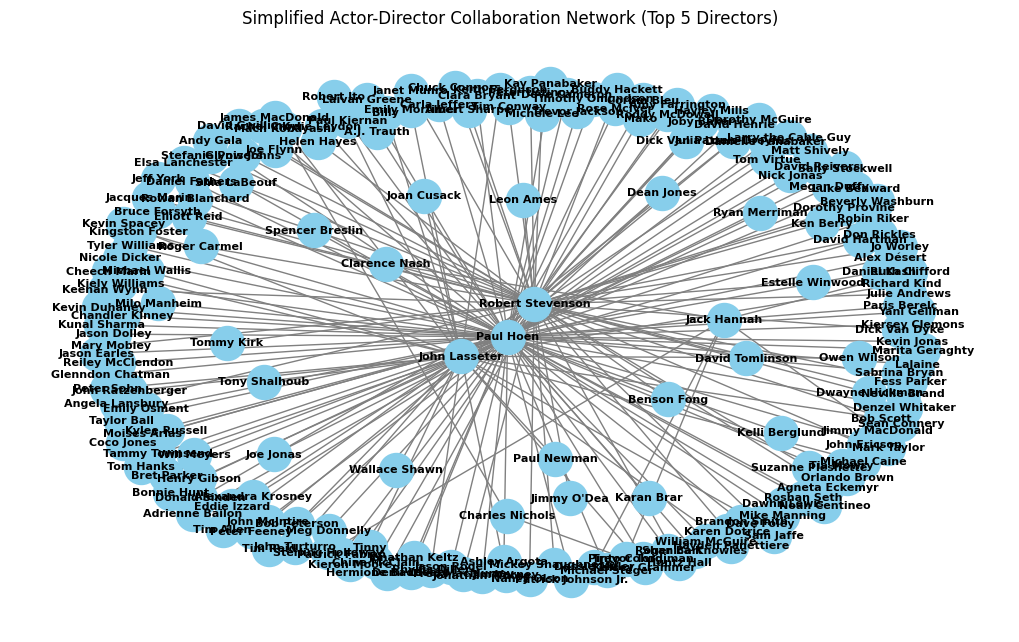

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("cleaned_hotstar_data.csv")

# Limit to Top 5 most frequent directors
top_directors = df[df['director'] != "Unknown"]['director'].value_counts().head(5).index.tolist()

# Create graph only for top directors
G = nx.Graph()

for _, row in df.iterrows():
    director = row['director']
    if director in top_directors:
        actors = row['cast'].split(", ") if row['cast'] != "Unknown" else []
        for actor in actors:
            G.add_edge(director.strip(), actor.strip())

# Visualize the simplified graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.8, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray',
        node_size=600, font_size=8, font_weight='bold')
plt.title("Simplified Actor-Director Collaboration Network (Top 5 Directors)")
plt.tight_layout()
plt.show()
